In [30]:
from pandas import read_csv

def read_data(file_path, num_features = 2, have_time = False):
    series_influ_A_df = read_csv(file_path, engine='python')
    series_influ_A_df = series_influ_A_df.rename(columns= {"Influenza A - All types of surveillance": "case"})

    # because since 2011-03-01 It was announced that the H1N12009 flu had been controlled and treated as regular seasonal flu and
    # since 2020-02-01, it's time for covid 
    
    series_influ_A_df = series_influ_A_df.loc [(series_influ_A_df['Month'] >='2011-04-01') & (series_influ_A_df['Month'] <='2020-02-01')]
    if not have_time:
        return series_influ_A_df.dropna()[["case", "temp", "dew", "tempmax", "humidity","tempmin","windspeed"][:num_features]]
    return series_influ_A_df.dropna()[["Month", "case", "temp", "dew", "tempmax", "humidity","tempmin","windspeed"][:num_features+1]]

file_path = '../temp_data/influA_vietnam_temp_month.csv'
#Load data set
df = read_data(file_path, have_time=True)



In [31]:
def plot_month_per_year(df, key):
    import plotly.graph_objects as go
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Month'], y=df[key], mode='lines+markers', name=f'Influenza A Cases in month'))
    fig.update_layout(
        title='Influenza A Cases Over Time',
        xaxis=dict(
            title='Month',
            tickvals=df['Month'],  
            tickformat='%Y-%m',
            tickangle=90,
        ),
        yaxis=dict(title=key),
        showlegend=True,
    )
 
    # Show plot
    fig.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

def calculate_errors(y_true, y_pred):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Root Mean Squared Percentage Error (RMSPE)
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100
    
    # Mean Absolute Residual (MARE)
    mare = np.mean(np.abs(y_true - y_pred))
    
    # Nash-Sutcliffe Efficiency (NSE)
    nse = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Normalized Nash-Sutcliffe Efficiency (NNSE)
    nnse = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    
    return mae, mse, rmse, mape, rmspe, mare, nse, nnse

In [33]:
def plot_r2(x,y, file_path=None):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import stats

    # Generate some sample data
    # x = y_inverse.flatten()
    # y = y_hat_inverse.flatten()

    # Compute the linear regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create the R-squared line
    r2_line = slope * x + intercept
    # r2 = r2_score(x, y)
    r2_pearson = r_value**2
    squared_error = np.square(x-y)

    # Print error metrics
    mae, mse, rmse, mape, rmspe, mare, nse, nnse = calculate_errors(x, y)
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSPE: {rmspe:.2f}%')
    print(f'MARE: {mare:.2f}')
    print(f'NSE: {nse:.2f}')
    print(f'NNSE: {nnse:.2f}')

    # Create the scatter plot
    plt.figure(figsize=(10, 12))

    # Subplot 1: Scatter plot and regression line
    plt.subplot(3, 1, 1)
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, r2_line, color='red', marker="o", label=f'Regression line')
    plt.title('Correlation ')

    # Add labels and title
    plt.xlabel('actual number of infection')
    plt.ylabel('forecast number of infection')
    plt.title(f'Scatter Plot with R-squared Line\nCorrelation: {r_value:.2f}, R^2: {r2_pearson:.2f}')
    plt.legend()
    plt.grid()

    # Subplot 2: Real values over time
    plt.subplot(3, 1, 2)
    plt.plot( x, color='blue', label='Real_values')
    plt.xlabel('Time')
    plt.ylabel('Real_values')
    plt.title('Real Values over Time')
    plt.legend()
    plt.grid(True)
    
    # Subplot 3: Forecast values over time
    plt.subplot(3, 1, 3)
    plt.plot(y, color='green', label='Forecast_values')
    plt.xlabel('Time')
    plt.ylabel('Forecast_values')
    plt.title('Forecast Values over Time')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    # plt.savefig(file_path)
    # plt.close()
    plt.show()

In [34]:
df = df[["Month", "case"]]
new_df = df.set_index(keys="Month")

In [35]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
# import numpy as np
# def calculate_err(y_true, y_pred):
#     # Mean Squared Error (MSE)
#     mse = mean_squared_error(y_true, y_pred)
#     # Root Mean Squared Error (RMSE)
#     rmse = np.sqrt(mse)
#     return mse, rmse

In [36]:

# season_fc_np = season_fc_df['case'].to_numpy()
# test_np = test['case'].to_numpy()
# season_mse, season_rmse = calculate_err(test_np, season_fc_np)
# print("MSE: ", season_mse, "RMSE: ", season_rmse)


In [37]:
import numpy as np

def remove_outlier_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(
        df > upper,
        np.nan,
        np.where(df < lower,np.nan,df)
        )
    return df

def remove_outlier_impute(df, impute_method= 'linear'):
    output_df = df.copy()
    if impute_method != "raw":
        output_df["case"] = remove_outlier_IQR(output_df['case'])
        match impute_method:
            case 'linear':
                output_df['case'] = output_df['case'].interpolate(method='linear')
            case 'spline':
                output_df['case'] = output_df['case'].interpolate(method='spline', order=3)
            case _:
                pass
    return output_df

In [38]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def exponential_moving_average(data, span):
    return data.ewm(span=span, adjust=False).mean()
# window_size = 2

def preprocessing(df, window_size, method, is_smooth):
    import pandas as pd
    df_ = pd.DataFrame()
    df_ = df.copy()
    is_ma, is_ema = is_smooth
    df_ = remove_outlier_impute(df_, method)
    if is_ema:
        # Apply Moving Average Filter
        
        df_['case'] = exponential_moving_average(df_['case'], window_size)
        df_ = df_.dropna()
    if is_ma:
        # Apply Moving Average Filter
        
        df_['case'] = moving_average(df_['case'], window_size)
        df_ = df_.dropna()
    return df_

# linear_df = remove_outlier_impute(new_df.reset_index(), 'linear').set_index(keys='Month')
# spline_df = remove_outlier_impute(new_df.reset_index(), 'spline').set_index(keys='Month')

linear_ma_df = preprocessing(new_df.reset_index(), 2, 'linear', [True, False]).set_index(keys='Month')
linear_ema_df = preprocessing(new_df.reset_index(), 2, 'linear', [False, True]).set_index(keys='Month')
spline_ma_df = preprocessing(new_df.reset_index(), 2, 'spline', [True, False]).set_index(keys='Month')
spline_ema_df = preprocessing(new_df.reset_index(), 2, 'spline', [False, True]).set_index(keys='Month')

def split_train_test(df):
    num_predict = 8
    look_back = 8
    test_size = num_predict
    length = len(df)
    dataset_length = length - (length -look_back) % num_predict
    rest = length - dataset_length
    dataset = df.iloc[rest:]
    train = dataset.iloc[: -test_size]
    test = dataset.iloc[-test_size:]

    return train,test

train, test = split_train_test(spline_ema_df)



In [39]:
from utils import adf_test, check_acorr_ljungbox
adf_test(train)
check_acorr_ljungbox(train, lags=10)

Results of Dickey-Fuller Test:
Test Statistic                 -4.987577
p-value                         0.000217
#Lags Used                      5.000000
Number of Observations Used    90.000000
Critical Value (1%)            -4.063054
Critical Value (5%)            -3.460450
Critical Value (10%)           -3.156294
dtype: float64
       lb_stat     lb_pvalue
1    62.144300  3.191896e-15
2    81.513804  1.992978e-18
3    82.812571  7.649258e-18
4    85.516706  1.178539e-17
5    95.968430  3.734527e-19
6   110.748890  1.420546e-21
7   123.106628  1.725814e-23
8   128.412770  6.033230e-24
9   128.636773  2.261056e-23
10  129.888298  4.922881e-23
Có tự tương quan với lag 1
Có tự tương quan với lag 2
Có tự tương quan với lag 3
Có tự tương quan với lag 4
Có tự tương quan với lag 5
Có tự tương quan với lag 6
Có tự tương quan với lag 7
Có tự tương quan với lag 8
Có tự tương quan với lag 9
Có tự tương quan với lag 10


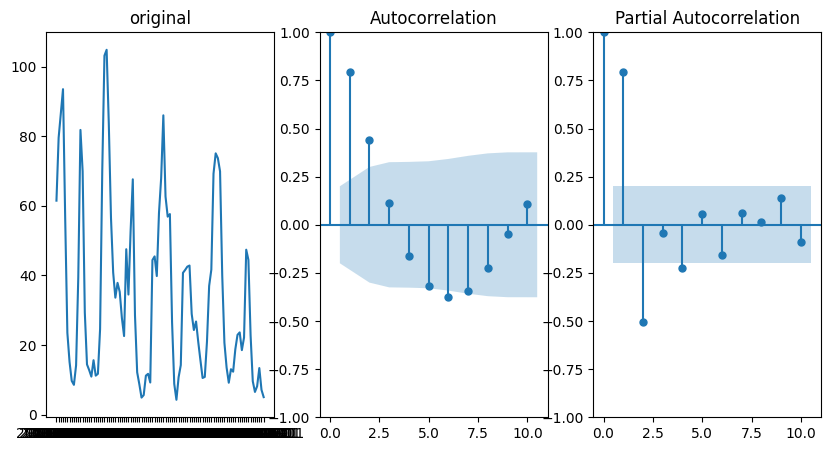

In [40]:
# Original Series
import statsmodels.api as sm
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].plot(train); axes[0].set_title('original')
# axes[1].set(ylim=(0,5))
sm.graphics.tsa.plot_acf(train.dropna(), ax=axes[1], lags=10)
sm.graphics.tsa.plot_pacf(train.dropna(), ax=axes[2], lags=10)

plt.show()

In [41]:
# How to build the ARIMA Model 

import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=10, # maximum p and q
                      # m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trend='c',
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
# chọn được p,d,q là 2,0,2

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=779.310, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=899.247, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=803.202, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=811.540, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=777.789, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=776.500, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=778.364, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=776.888, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=776.500, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.581 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -384.250
Date:                Sun, 30 Jun 2024   AIC               

In [42]:
from statsmodels.tsa.arima.model import ARIMA

def find_model_arima(orders, data):
  # model = ARIMA(train, order=(2,0,1))

  # # dùng lbfgs để ước lượng tham số maximum likelyhood
  # model_fit = model.fit()
  # print(model_fit.summary())
  models = []
  for order in orders:
    a={}
    model = ARIMA(data, order = order).fit()
    model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
    # print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
    a["name"] = model_name
    a["aic"] = model.aic
    a["bic"] = model.bic
    models.append(a)
  return models
orders = [(1,0,2), (1,0,3), (2,0,2),(2,0,3), (2,0,1), (1,0,1)]
models = find_model_arima(orders, train)
for model in models:
   print('{} --> AIC={}; BIC={}'.format(model["name"], model["aic"], model["bic"]))

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency info

ARIMA(1,0,2) --> AIC=781.2008668881683; BIC=794.0226078455075
ARIMA(1,0,3) --> AIC=777.6032808257925; BIC=792.9893699745995
ARIMA(2,0,2) --> AIC=775.7336724768936; BIC=791.1197616257007
ARIMA(2,0,3) --> AIC=774.2626272677103; BIC=792.2130646079852
ARIMA(2,0,1) --> AIC=777.7887615322734; BIC=790.6105024896126
ARIMA(1,0,1) --> AIC=779.3102979342586; BIC=789.56769070013


d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,0,0), trend='c')

# dùng lbfgs để ước lượng tham số maximum likelyhood
model_fit = model.fit()
print(model_fit.summary())

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                               SARIMAX Results                                
Dep. Variable:                   case   No. Observations:                   96
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -384.250
Date:                Sun, 30 Jun 2024   AIC                            776.500
Time:                        13:04:05   BIC                            786.758
Sample:                    07-01-2011   HQIC                           780.646
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3966      5.623      6.117      0.000      23.376      45.417
ar.L1          1.2106      0.100     12.075      0.000       1.014       1.407
ar.L2         -0.5154      0.097     -5.301      0.0

d:\my_study\gr3\DATN\venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



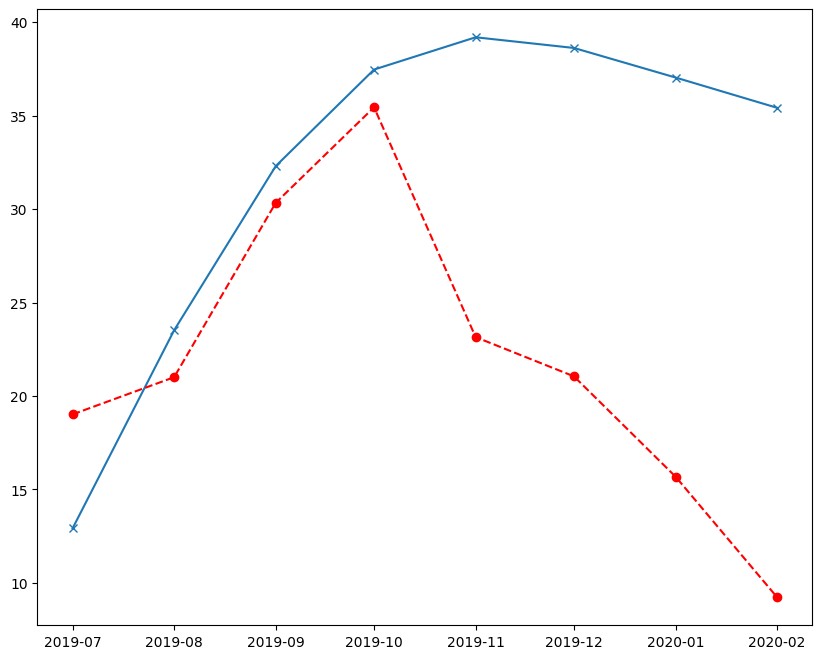

In [44]:
import pandas as pd
fc = model_fit.forecast(len(test), alpha=0.05)
fc_df = pd.DataFrame(fc).reset_index().rename(columns={'index': 'Month', 'predicted_mean': 'case'})
# test_df =  pd.DataFrame(test).reset_index()
# fc_df["Month"] = test_df["Month"]
plt.figure(figsize=(10,8))
plt.plot(fc_df['Month'], fc_df['case'], label='Actual', marker='x')
plt.plot(fc_df['Month'], test['case'], color='red', linestyle='--', label='Forecast', marker='o')
plt.show()

MAE: 11.72
MSE: 219.95
RMSE: 14.83
MAPE: 78.62%
RMSPE: 118.38%
MARE: 11.72
NSE: -2.78
NNSE: 0.44


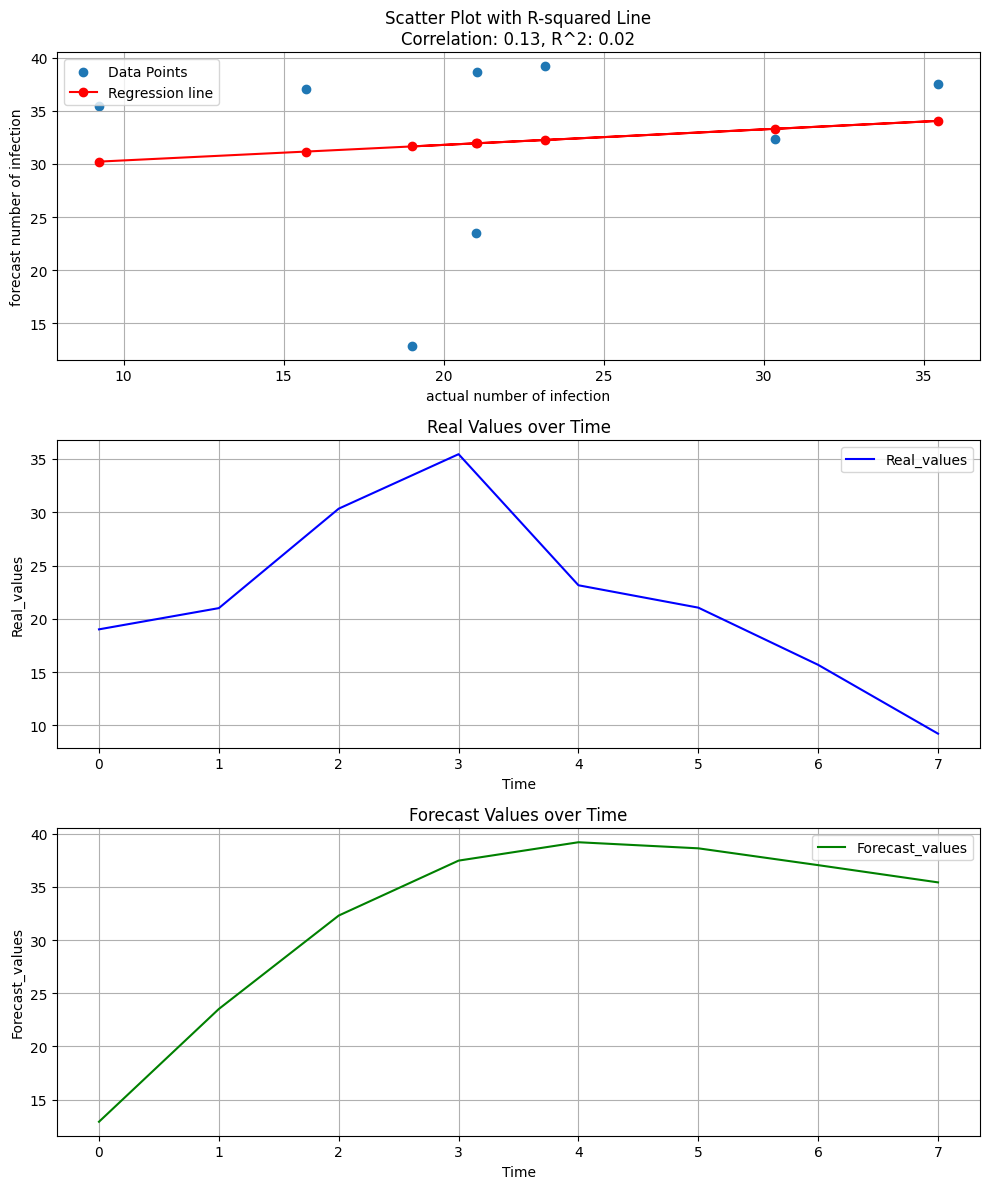

In [45]:
plot_r2(test['case'].values, fc_df['case'].values)

## Seasonal

In [46]:
spline_ema_df_season = spline_ema_df.diff(periods=12).dropna()

In [47]:
train_season, test_season = split_train_test(spline_ema_df_season)
adf_test(train_season)
check_acorr_ljungbox(train_season, lags=10)

Results of Dickey-Fuller Test:
Test Statistic                 -5.367233
p-value                         0.000042
#Lags Used                     10.000000
Number of Observations Used    69.000000
Critical Value (1%)            -4.096354
Critical Value (5%)            -3.476155
Critical Value (10%)           -3.165415
dtype: float64
       lb_stat     lb_pvalue
1    52.753881  3.780755e-13
2    78.953179  7.170262e-18
3    92.676139  5.830002e-20
4    96.876260  4.546209e-20
5    97.135752  2.120653e-19
6    97.181629  9.710160e-19
7    97.770014  3.113073e-18
8   101.537203  2.070221e-18
9   110.648015  1.085128e-19
10  126.490265  2.425391e-22
Có tự tương quan với lag 1
Có tự tương quan với lag 2
Có tự tương quan với lag 3
Có tự tương quan với lag 4
Có tự tương quan với lag 5
Có tự tương quan với lag 6
Có tự tương quan với lag 7
Có tự tương quan với lag 8
Có tự tương quan với lag 9
Có tự tương quan với lag 10


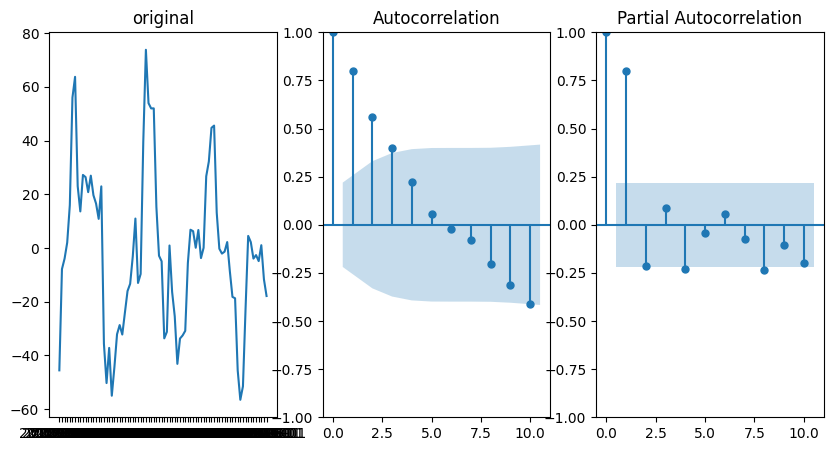

In [48]:
# Original Series
import statsmodels.api as sm
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].plot(train_season); axes[0].set_title('original')
# axes[1].set(ylim=(0,5))
sm.graphics.tsa.plot_acf(train_season.dropna(), ax=axes[1], lags=10)
sm.graphics.tsa.plot_pacf(train_season.dropna(), ax=axes[2], lags=10)

plt.show()

In [49]:
# How to build the ARIMA Model 

import pmdarima as pm

model_sarima = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=10, # maximum p and q
                      m=12,
                      # m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      D=0, start_P=0, max_P=3, 
                      # trend='c', 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
# chọn được p,d,q là 1,0,1, 0,1,1 with no constant

print(model_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=777.326, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=899.247, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=798.542, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=810.552, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=997.445, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=779.310, Time=0.06 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=777.722, Time=0.21 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=776.673, Time=0.27 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=773.726, Time=0.80 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=794.925, Time=0.56 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=796.114, Time=0.51 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=77

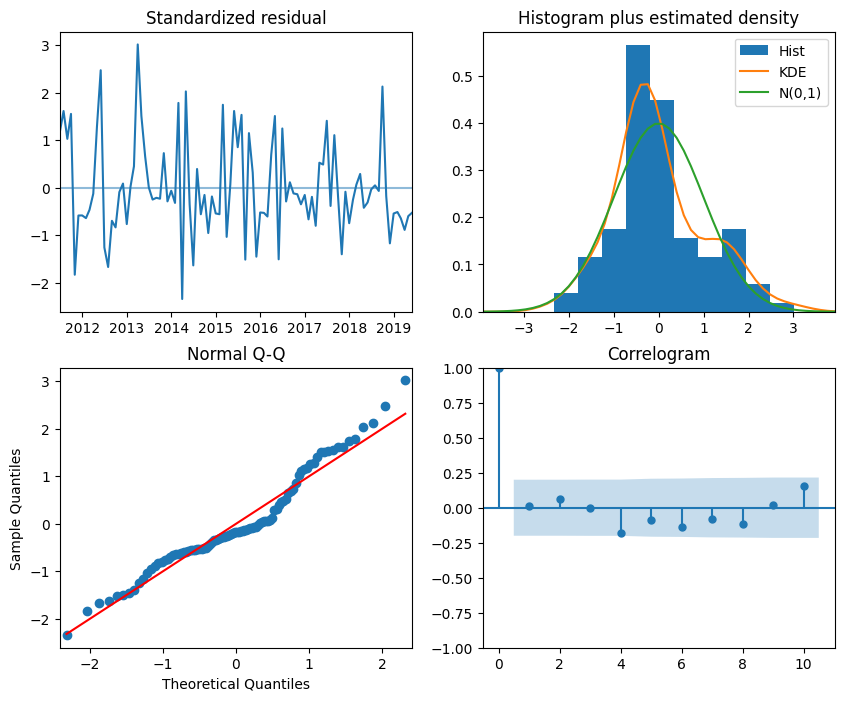

In [50]:
model_sarima.plot_diagnostics(figsize=(10,8))
plt.show()

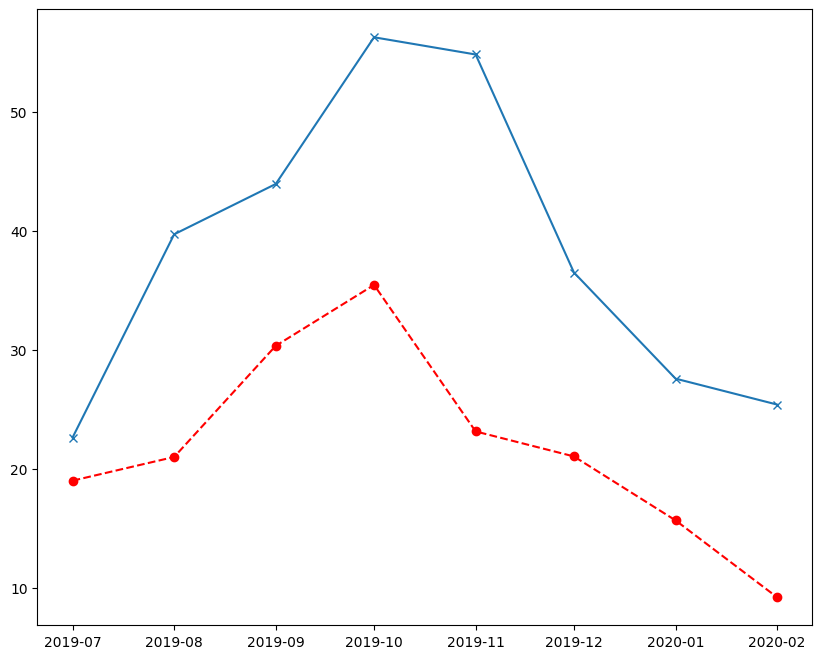

In [51]:
season_fc = model_sarima.predict(n_periods=len(test), alpha=0.05)
season_fc_df = pd.DataFrame(season_fc).reset_index().rename(columns={'index': 'Month', 0: 'case'})
plt.figure(figsize=(10,8))
plt.plot(season_fc_df['Month'], season_fc_df['case'], label='Actual', marker='x')
plt.plot(season_fc_df['Month'], test['case'], color='red', linestyle='--', label='Forecast', marker='o')
plt.show()


MAE: 16.48
MSE: 327.69
RMSE: 18.10
MAPE: 84.08%
RMSPE: 96.35%
MARE: 16.48
NSE: -4.63
NNSE: 0.51


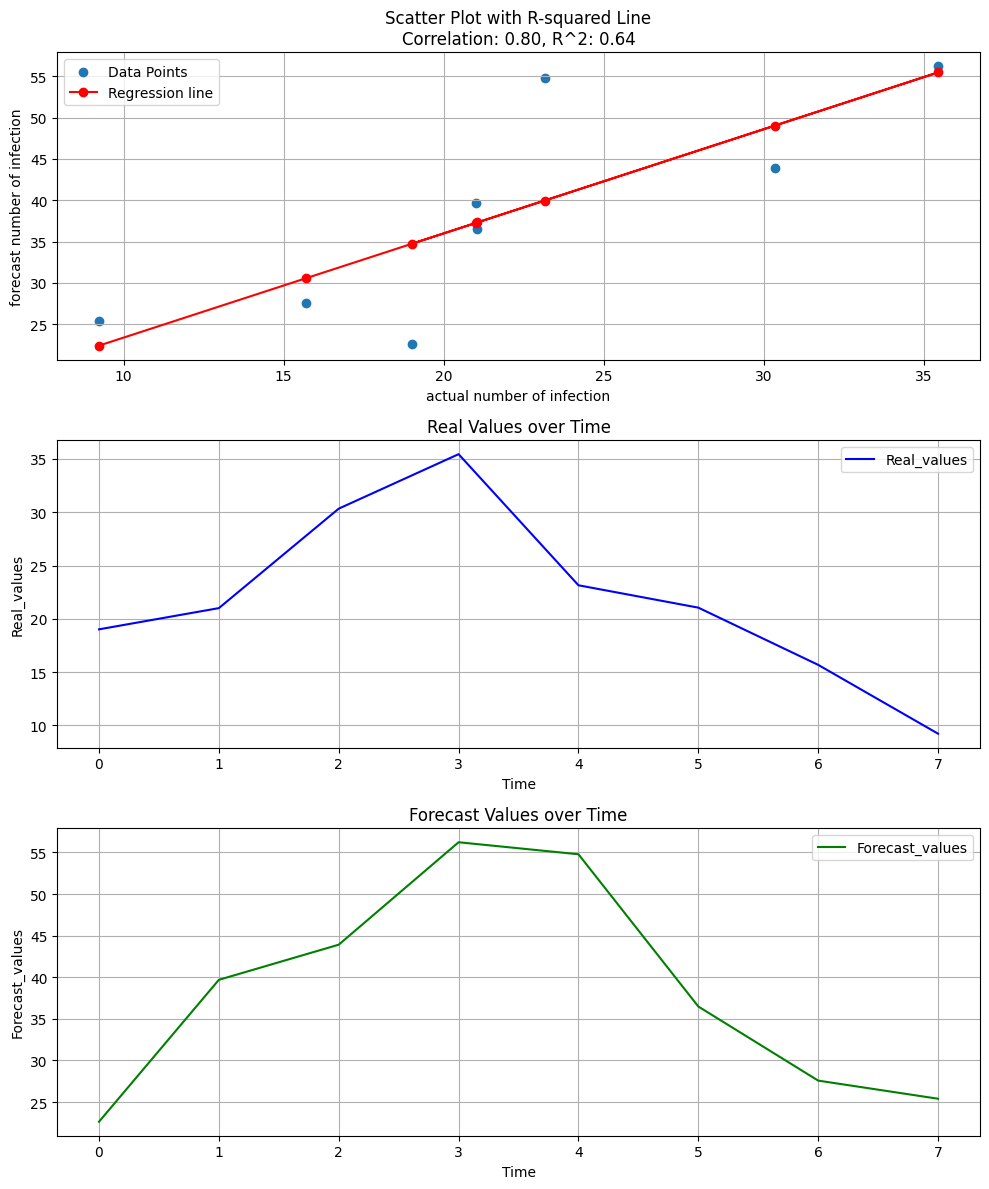

In [52]:
plot_r2(test['case'].values, season_fc_df['case'].values)